## Loading libraries

In [4]:
#  short workbook to convert currency string into float number value
import pandas as pd
import numpy as np

import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'
from statsmodels.tsa.seasonal import seasonal_decompose

## Loading dataset

In [5]:
df = pd.read_csv('ma_lga_12345.csv', index_col = 0, parse_dates = True)

## Selecting one type of properties

Houses with 2-bedrooms

In [6]:
df_h2 = df.reset_index()
df_h2 = df_h2[(df_h2.type == 'house') & (df_h2.bedrooms == 2)]

In [7]:
# reseting index to datetime
df_h2 = df_h2.set_index('saledate').drop(['type', 'bedrooms'], axis = 1)

In [8]:
df_h2

,MA
saledate,
2007-09-30,441854
2007-12-31,441854
2008-03-31,441854
2008-06-30,441854
2008-09-30,451583
2008-12-31,440256
2009-03-31,442566
2009-06-30,446113
2009-09-30,440123


## Seasonal decomposition

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
decomposition = seasonal_decompose(df_h2['MA'], model='multiplicative')

Decomposed data show the upward trend over yeear and distinct seasonality during each year

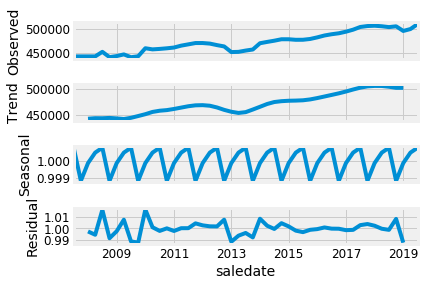

In [13]:
decomposition.plot();

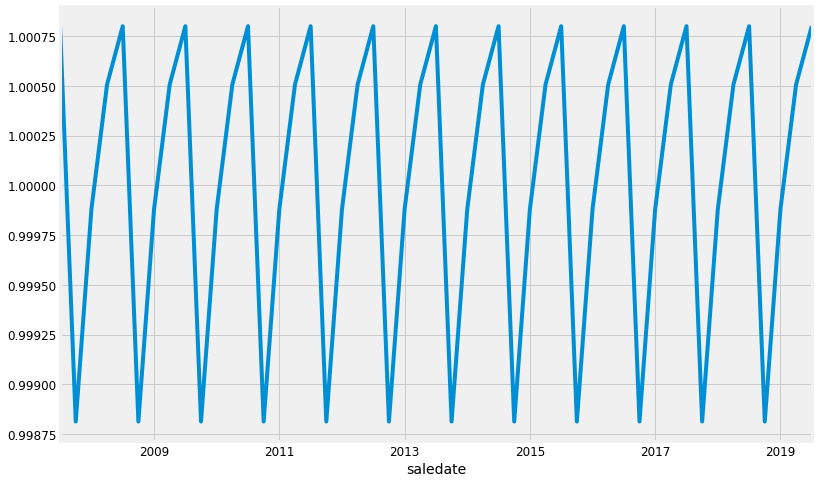

In [16]:
decomposition.seasonal.plot(figsize = (12,8));

## EDA

In [18]:
# number of data points
len(df_h2['MA'])

49

Data is not completed for the first and the last year. In year 2007 we have only data for two last quarters and in year 2019 we have only data for 3 first quarters. For data completeness I removed data in 2007.
My train data will till end of 2018 and my test data will be year 2019.

In [20]:
df_h2[:8]

,MA
saledate,
2007-09-30,441854
2007-12-31,441854
2008-03-31,441854
2008-06-30,441854
2008-09-30,451583
2008-12-31,440256
2009-03-31,442566
2009-06-30,446113


In [21]:
df_h2.tail()

,MA
saledate,
2018-09-30,504318
2018-12-31,506001
2019-03-31,496133
2019-06-30,500158
2019-09-30,510712


In [26]:
# removing data for 2007
df_h2 = df_h2[2:]